### Project - Hr employee attrition (Classification) - Nehal Bendale

### Problem Statement - To predict attrition of employees

### About Dataset

HR Analytics helps us with interpreting organizational data. It finds out the people-related trends in the data and helps the HR Department take the appropriate steps to keep the organization running smoothly and profitably. Attrition is a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with.
Interestingly, machine learning models can be deployed to predict potential attrition cases, thereby helping the appropriate HR Personnel take the necessary steps to retain the employee.

Data Source - Kaggle

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [120]:
df=pd.read_csv('HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [121]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


First five rows of dataset.

In [122]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


Last five rows of dataset.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Checking data types of columns in dataset.

In [124]:
df.shape

(1470, 35)

There are 1470 rows and 35 columns in dataset

In [125]:
df.size

51450

There are 51450 data points in dataset.

In [126]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Description of data between 0 to 1.

In [127]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

There is skewness in data columns.

In [128]:
#cheking missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in all columns.

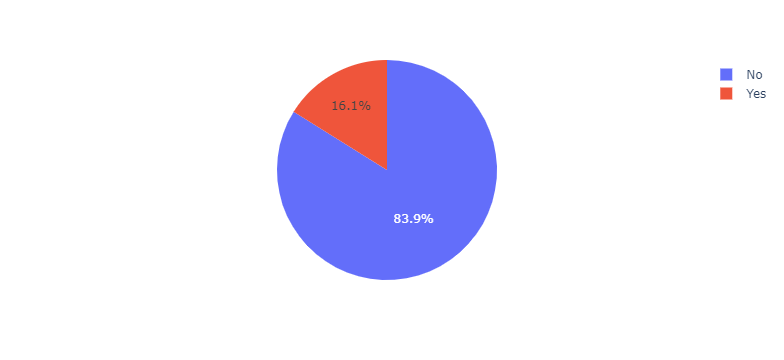

In [129]:
px.pie(df,names=df["Attrition"])

There is 16% of attrition chances in target column.

In [130]:
df.drop(['MaritalStatus','Department','EducationField','EmployeeCount','EmployeeNumber','Gender','Over18','JobRole'],axis=1,inplace=True)
df.shape

(1470, 27)

Deleting unwanted columns.

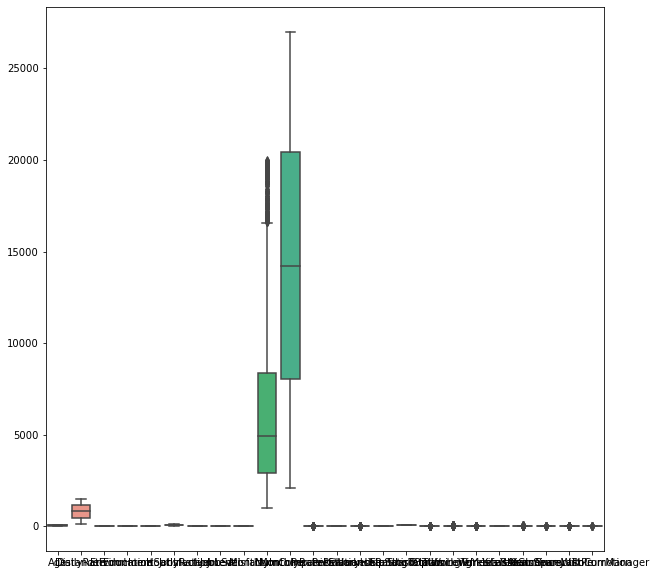

In [131]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.show()

There are not outliers in all columns except MonthlyIncome column.

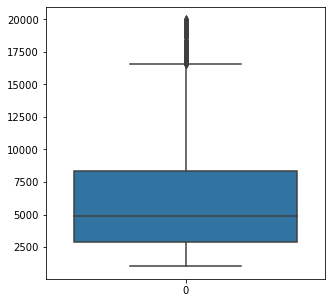

In [132]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['MonthlyIncome'])
plt.show()

So lets remove outliers for monthlyIncome column by using quantile method.

In [133]:
q1=df["MonthlyIncome"].quantile(0.25)
q3=df["MonthlyIncome"].quantile(0.75)
iqr=q3-q1
upperlimit=q3+(1.5*iqr)
df["MonthlyIncome"]=np.where(df["MonthlyIncome"]>upperlimit,upperlimit,df["MonthlyIncome"])

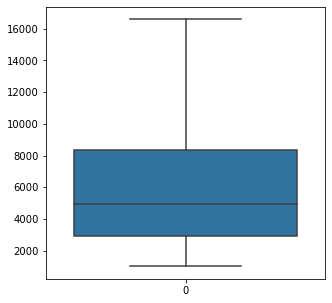

In [134]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['MonthlyIncome'])
plt.show()

In [135]:
numeric_data=df.select_dtypes(include='number')
numeric_data

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993.0,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130.0,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090.0,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909.0,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468.0,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571.0,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991.0,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142.0,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390.0,...,4,80,0,17,3,2,9,6,0,8


seprating numeric data columns from dataset.

In [136]:
categorical_data=df.select_dtypes(exclude='number')
categorical_data

,Attrition,BusinessTravel,OverTime
0,Yes,Travel_Rarely,Yes
1,No,Travel_Frequently,No
2,Yes,Travel_Rarely,Yes
3,No,Travel_Frequently,Yes
4,No,Travel_Rarely,No
...,...,...,...
1465,No,Travel_Frequently,No
1466,No,Travel_Rarely,No
1467,No,Travel_Rarely,Yes
1468,No,Travel_Frequently,No


seprating categorical columns datafrom dataset

In [137]:
df1 = pd.get_dummies(categorical_data,drop_first=True)
df1

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,OverTime_Yes
0,1,0,1,1
1,0,1,0,0
2,1,0,1,1
3,0,1,0,1
4,0,0,1,0
...,...,...,...,...
1465,0,1,0,0
1466,0,0,1,0
1467,0,0,1,1
1468,0,1,0,0


Making dummies of categorical columns.

In [138]:
df=pd.concat([numeric_data,df1],axis=1)
df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993.0,...,0,1,6,4,0,5,1,0,1,1
1,49,279,8,1,3,61,2,2,2,5130.0,...,3,3,10,7,1,7,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090.0,...,3,3,0,0,0,0,1,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909.0,...,3,3,8,7,3,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468.0,...,3,3,2,2,2,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571.0,...,3,3,5,2,0,3,0,1,0,0
1466,39,613,6,1,4,42,2,3,1,9991.0,...,5,3,7,7,1,7,0,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142.0,...,0,3,6,2,0,3,0,0,1,1
1468,49,1023,2,3,4,63,2,2,2,5390.0,...,3,2,9,6,0,8,0,1,0,0


concanating numeric and categorical data columns in new dataframe.

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1470 non-null   int64  
 1   DailyRate                         1470 non-null   int64  
 2   DistanceFromHome                  1470 non-null   int64  
 3   Education                         1470 non-null   int64  
 4   EnvironmentSatisfaction           1470 non-null   int64  
 5   HourlyRate                        1470 non-null   int64  
 6   JobInvolvement                    1470 non-null   int64  
 7   JobLevel                          1470 non-null   int64  
 8   JobSatisfaction                   1470 non-null   int64  
 9   MonthlyIncome                     1470 non-null   float64
 10  MonthlyRate                       1470 non-null   int64  
 11  NumCompaniesWorked                1470 non-null   int64  
 12  Percen

Checking data types of new dataframe.

### Features Selection

In [140]:
X=df.drop('Attrition_Yes',axis=1)
Y=df['Attrition_Yes']

### Data Standardization

In [141]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,Y,test_size=0.2,random_state=42)

Spliting data into for training and testing.

Lets apply Machine Learning algorithms for prediction.

### Logistics Regression

In [143]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [144]:
print("training score is",LR.score(X_train,y_train))

training score is 0.8792517006802721


In [145]:
print("testing score is",LR.score(X_test,y_test))

testing score is 0.8775510204081632


In [146]:
y_pred=LR.predict(X_test)

In [147]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[249,   6],
       [ 30,   9]], dtype=int64)

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.60      0.23      0.33        39

    accuracy                           0.88       294
   macro avg       0.75      0.60      0.63       294
weighted avg       0.85      0.88      0.85       294



In [149]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))
print("precsion is ",metrics.precision_score(y_test,y_pred))
print("recall is ",metrics.recall_score(y_test,y_pred))

Accuracy is  0.8775510204081632
precsion is  0.6
recall is  0.23076923076923078


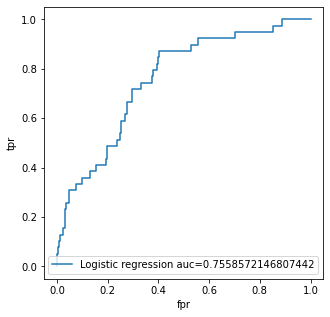

In [150]:
plt.figure(figsize=(5,5))
y_pred_proba =model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic regression auc="+str(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

### ### Navie Bays (Bernoulli)

In [151]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(X_train,y_train)

BernoulliNB()

In [152]:
print("training score is",model.score(X_train,y_train))

training score is 0.8520408163265306


In [153]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.8741496598639455


In [154]:
y_pred=model.predict(X_test)

In [155]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[241,  14],
       [ 23,  16]], dtype=int64)

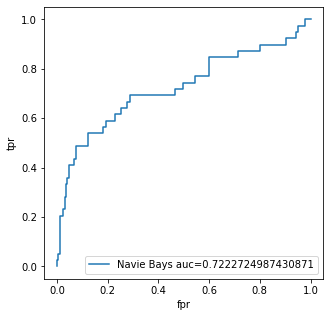

In [156]:
plt.figure(figsize=(5,5))
y_pred_proba =model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Navie Bays auc="+str(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.53      0.41      0.46        39

    accuracy                           0.87       294
   macro avg       0.72      0.68      0.70       294
weighted avg       0.86      0.87      0.87       294



In [158]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))
print("precsion is ",metrics.precision_score(y_test,y_pred))
print("recall is ",metrics.recall_score(y_test,y_pred))

Accuracy is  0.8741496598639455
precsion is  0.5333333333333333
recall is  0.41025641025641024


### KNN

In [159]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier (n_neighbors=9,metric="euclidean")
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [160]:
print("training score is",model.score(X_train,y_train))

training score is 0.8469387755102041


In [161]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.8707482993197279


In [162]:
y_pred=model.predict(X_test)

In [163]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[254,   1],
       [ 37,   2]], dtype=int64)

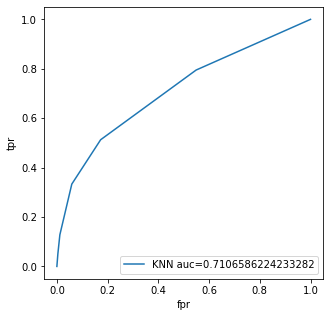

In [164]:
plt.figure(figsize=(5,5))
y_pred_proba =model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="KNN auc="+str(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

In [165]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.67      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.77      0.52      0.51       294
weighted avg       0.85      0.87      0.82       294



In [166]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))
print("precsion is ",metrics.precision_score(y_test,y_pred))
print("recall is ",metrics.recall_score(y_test,y_pred))

Accuracy is  0.8707482993197279
precsion is  0.6666666666666666
recall is  0.05128205128205128


### SVM

In [167]:
from sklearn.svm import SVC
svm_model=SVC(probability=True)
svm_model.fit(X_train,y_train)

SVC(probability=True)

In [168]:
print("training score is",svm_model.score(X_train,y_train))

training score is 0.907312925170068


In [169]:
print("testing score is",svm_model.score(X_test,y_test))

testing score is 0.8741496598639455


In [170]:
y_pred=svm_model.predict(X_test)

In [171]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[254,   1],
       [ 36,   3]], dtype=int64)

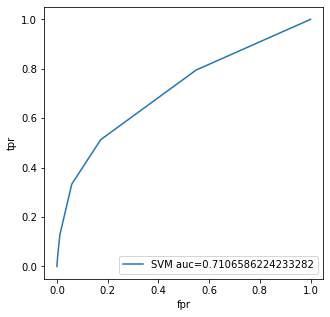

In [172]:
plt.figure(figsize=(5,5))
y_pred_proba =model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="SVM auc="+str(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



In [174]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))
print("precsion is ",metrics.precision_score(y_test,y_pred))
print("recall is ",metrics.recall_score(y_test,y_pred))

Accuracy is  0.8741496598639455
precsion is  0.75
recall is  0.07692307692307693


### Decision Tree

In [175]:
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [176]:
print("training score is",model.score(X_train,y_train))

training score is 1.0


In [177]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.7585034013605442


In [178]:
y_pred=model.predict(X_test)

In [179]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[214,  41],
       [ 30,   9]], dtype=int64)

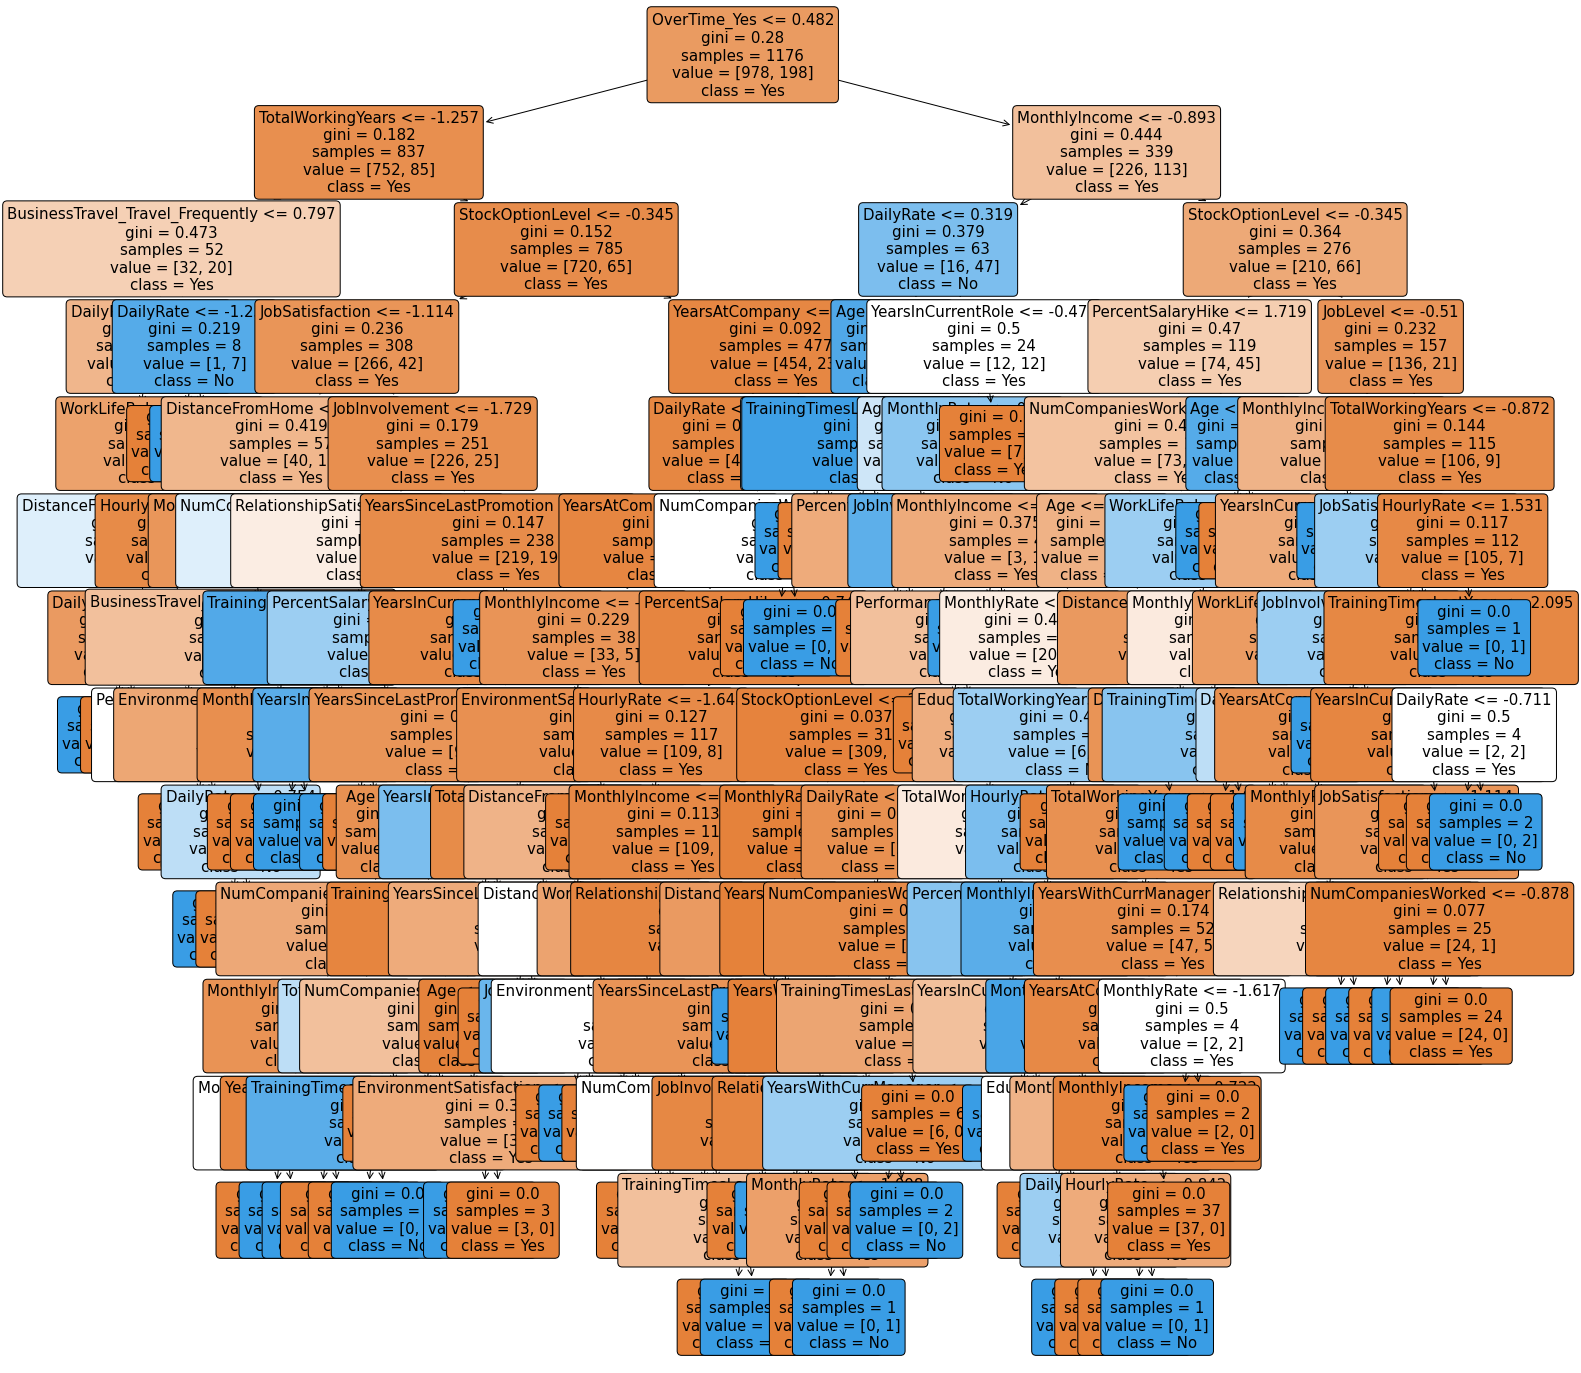

In [180]:
plt.figure(figsize=(25,25)) 
figure=tree.plot_tree(model,feature_names=X.columns[::],class_names=["Yes","No"],filled=True,rounded=True,fontsize=15);

In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       255
           1       0.18      0.23      0.20        39

    accuracy                           0.76       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.78      0.76      0.77       294



In [182]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))
print("precsion is ",metrics.precision_score(y_test,y_pred))
print("recall is ",metrics.recall_score(y_test,y_pred))

Accuracy is  0.7585034013605442
precsion is  0.18
recall is  0.23076923076923078


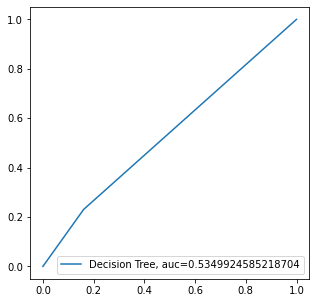

In [183]:
plt.figure(figsize=(5,5))
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))
plt.legend(loc=4)
plt.show()

There is overfitting in Decision tree model.

In [184]:
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV,RandomizedSearchCV
#Pruning
#Parameters
hyper_params=dict(criterion=['gini'],max_depth=list(range(1,600)),min_samples_split=list(range(1,600)),min_samples_leaf=list(range(1,600)))
#Gridsearch
Random=RandomizedSearchCV(model,param_distributions=hyper_params,scoring="accuracy",cv=10)
#Fit
Random.fit(X_train,y_train)
#Best estimators
Random.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=110, min_samples_split=257)

In [185]:
model=DecisionTreeClassifier(max_depth=405, min_samples_leaf=98,
                       min_samples_split=250)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=405, min_samples_leaf=98,
                       min_samples_split=250)

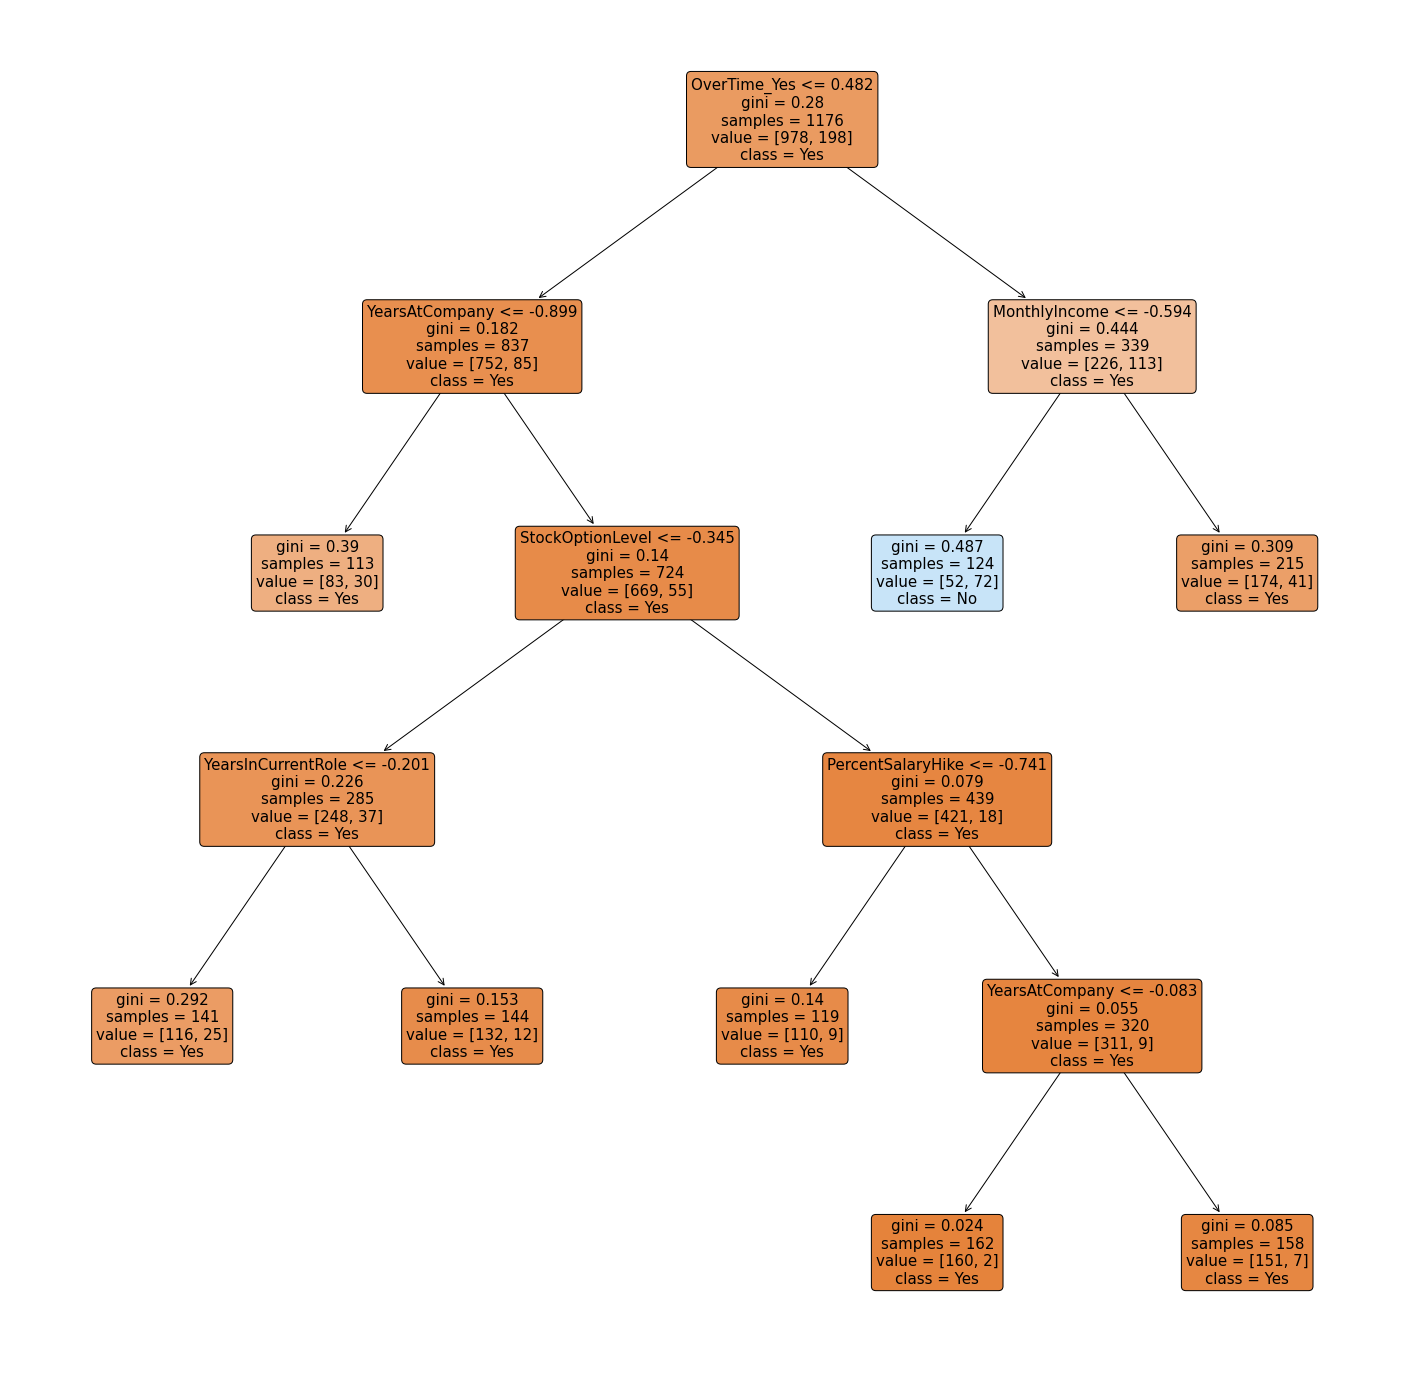

In [186]:
plt.figure(figsize=(25,25)) 
figure=tree.plot_tree(model,feature_names=X.columns[::],class_names=["Yes","No"],filled=True,rounded=True,fontsize=15);

In [187]:
print("training score is",model.score(X_train,y_train))

training score is 0.8486394557823129


In [188]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.8401360544217688


In [189]:
y_pred=model.predict(X_test)

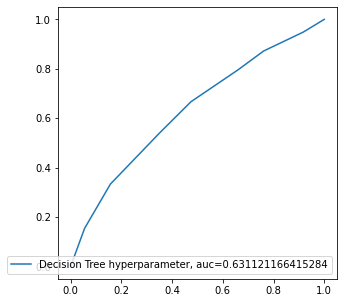

In [190]:
plt.figure(figsize=(5,5))
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Decision Tree hyperparameter, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [191]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       255
           1       0.30      0.15      0.20        39

    accuracy                           0.84       294
   macro avg       0.59      0.55      0.56       294
weighted avg       0.80      0.84      0.82       294



In [192]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))
print("precsion is ",metrics.precision_score(y_test,y_pred))
print("recall is ",metrics.recall_score(y_test,y_pred))

Accuracy is  0.8401360544217688
precsion is  0.3
recall is  0.15384615384615385


### Ensemble Techniques

### Random Forest 

In [193]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [194]:
print("training score is",model.score(X_train,y_train))

training score is 1.0


In [195]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.8673469387755102


In [196]:
y_pred=model.predict(X_test)

In [197]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.50      0.08      0.13        39

    accuracy                           0.87       294
   macro avg       0.69      0.53      0.53       294
weighted avg       0.83      0.87      0.82       294



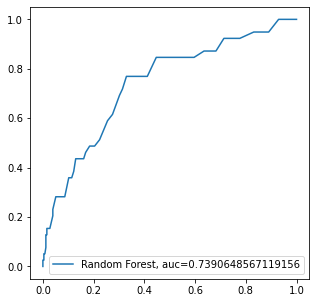

In [198]:
plt.figure(figsize=(5,5))
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [199]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))
print("precsion is ",metrics.precision_score(y_test,y_pred))
print("recall is ",metrics.recall_score(y_test,y_pred))

Accuracy is  0.8673469387755102
precsion is  0.5
recall is  0.07692307692307693


### Extra Trees

In [200]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [201]:
print("training score is",model.score(X_train,y_train))

training score is 1.0


In [202]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.8707482993197279


In [203]:
y_pred=model.predict(X_test)

In [204]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.67      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.77      0.52      0.51       294
weighted avg       0.85      0.87      0.82       294



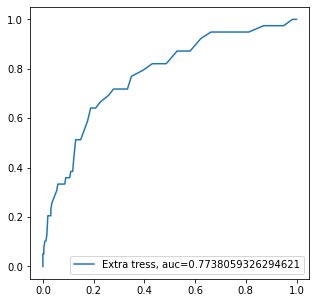

In [205]:
plt.figure(figsize=(5,5))
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Extra tress, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [206]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))
print("precsion is ",metrics.precision_score(y_test,y_pred))
print("recall is ",metrics.recall_score(y_test,y_pred))

Accuracy is  0.8707482993197279
precsion is  0.6666666666666666
recall is  0.05128205128205128


### Bagging

In [207]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier()
model.fit(X_train,y_train)

BaggingClassifier()

In [208]:
print("training score is",model.score(X_train,y_train))

training score is 0.9863945578231292


In [209]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.8299319727891157


In [210]:
y_pred=model.predict(X_test)

In [211]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       255
           1       0.21      0.10      0.14        39

    accuracy                           0.83       294
   macro avg       0.54      0.52      0.52       294
weighted avg       0.78      0.83      0.80       294



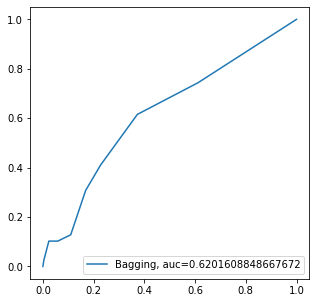

In [212]:
plt.figure(figsize=(5,5))
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Bagging, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [213]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))
print("precsion is ",metrics.precision_score(y_test,y_pred))
print("recall is ",metrics.recall_score(y_test,y_pred))

Accuracy is  0.8299319727891157
precsion is  0.21052631578947367
recall is  0.10256410256410256


### AdaBoost

In [214]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_train,y_train)

AdaBoostClassifier()

In [215]:
print("training score is",model.score(X_train,y_train))

training score is 0.9022108843537415


In [216]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.8469387755102041


In [217]:
y_pred=model.predict(X_test)

In [218]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       255
           1       0.38      0.26      0.31        39

    accuracy                           0.85       294
   macro avg       0.64      0.60      0.61       294
weighted avg       0.82      0.85      0.83       294



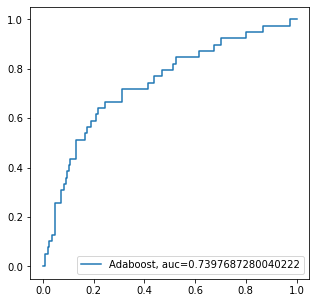

In [219]:
plt.figure(figsize=(5,5))
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Adaboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [220]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))
print("precsion is ",metrics.precision_score(y_test,y_pred))
print("recall is ",metrics.recall_score(y_test,y_pred))

Accuracy is  0.8469387755102041
precsion is  0.38461538461538464
recall is  0.2564102564102564


### GradientBoosting

In [221]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [222]:
print("training score is",model.score(X_train,y_train))

training score is 0.9472789115646258


In [223]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.8707482993197279


In [224]:
y_pred=model.predict(X_test)

In [225]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.53      0.21      0.30        39

    accuracy                           0.87       294
   macro avg       0.71      0.59      0.61       294
weighted avg       0.84      0.87      0.84       294



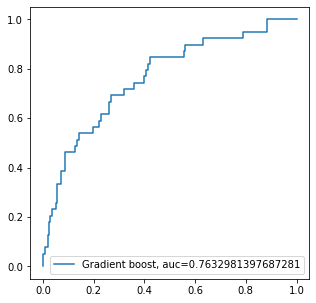

In [226]:
plt.figure(figsize=(5,5))
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Gradient boost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [227]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))
print("precsion is ",metrics.precision_score(y_test,y_pred))
print("recall is ",metrics.recall_score(y_test,y_pred))

Accuracy is  0.8707482993197279
precsion is  0.5333333333333333
recall is  0.20512820512820512


### XGBoost

In [228]:
from xgboost.sklearn import XGBClassifier 
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [229]:
print("training score is",model.score(X_train,y_train))

training score is 1.0


In [230]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.8639455782312925


In [231]:
y_pred=model.predict(X_test)

In [232]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       255
           1       0.48      0.26      0.33        39

    accuracy                           0.86       294
   macro avg       0.68      0.61      0.63       294
weighted avg       0.84      0.86      0.85       294



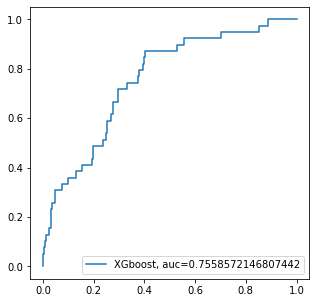

In [233]:
plt.figure(figsize=(5,5))
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="XGboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [234]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))
print("precsion is ",metrics.precision_score(y_test,y_pred))
print("recall is ",metrics.recall_score(y_test,y_pred))

Accuracy is  0.8639455782312925
precsion is  0.47619047619047616
recall is  0.2564102564102564


### Result

In [235]:
result=pd.DataFrame({"Algoritm":["Logistic Regression","Naive Bayes","KNN","SVM","Decision Tree","Decision Tree after Hyerparametric Tunning","Random Forest","Extra Trees","Bagging Classification","Adaboost","Gradient Boost","XgBoost"],
                     "Accuracy":[0.8775,0.8741, 0.8707,0.8741,0.7687,0.8401,0.8741,0.8707,0.8605, 0.8469,0.8707,0.8639],
                     "Precision":[0.6,0.5333,0.66666, 0.75,0.1777,0.3, 0.625,0.6,0.4,0.3846,0.5333, 0.4761],
                     "Recall":[0.2307,0.4102,0.05128,0.07692,0.2051,0.1538,0.1282,0.07692,0.1025,0.2564,0.2051,0.2564],
                     "AUC":[0.8101,0.7222,0.7106,0.7106,0.5300,0.6311,0.7509,0.7114,0.6735,0.7397,0.7633,0.7558]},index=list(range(1,13)))
result

,Algoritm,Accuracy,Precision,Recall,AUC
1,Logistic Regression,0.8775,0.60000,0.23070,0.8101
2,Naive Bayes,0.8741,0.53330,0.41020,0.7222
3,KNN,0.8707,0.66666,0.05128,0.7106
4,SVM,0.8741,0.75000,0.07692,0.7106
5,Decision Tree,0.7687,0.17770,0.20510,0.5300
6,Decision Tree after Hyerparametric Tunning,0.8401,0.30000,0.15380,0.6311
7,Random Forest,0.8741,0.62500,0.12820,0.7509
8,Extra Trees,0.8707,0.60000,0.07692,0.7114
9,Bagging Classification,0.8605,0.40000,0.10250,0.6735
10,Adaboost,0.8469,0.38460,0.25640,0.7397


### Conclusion
The final result shows us Logistic Regression algorithm is best model for future prediction as it has highest AUC value.

#### Prediction

In [237]:
prediction= pd.DataFrame({'Actual value': y_test, 'Predicted value':LR.predict(X_test)})
prediction.head(10)

,Actual value,Predicted value
1041,0,0
184,0,0
1222,1,0
67,0,0
220,0,0
494,0,0
430,0,0
240,0,0
218,0,0
49,0,0


### Thank You